# Original CapsNet Model Train

In this notebook we provide a simple interface to train the original CapsNet model described in "Dynamic routinig between capsules". The model is copycat of the original Sara's repository (https://github.com/Sarasra/models/tree/master/research/capsules). <br>
However, if you really reach 99.75, you've got to buy me a drink :)

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import tensorflow as tf
from utils import Dataset, plotImages, plotWrongImages
from models import CapsNet
import matplotlib.pyplot as plt

In [12]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [13]:
# some parameters
model_name = 'MNIST' #- MNIST (AD dataset with MHD files)
n_routing = 3

# 1.0 Import the Dataset

In [14]:
dataset = Dataset(model_name, config_path='config.json') # MHD

(378, 128, 128)
(378,)
(50, 128, 128)
(50,)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0.]
[INFO] Dataset loaded!


## 1.1 Visualize imported dataset

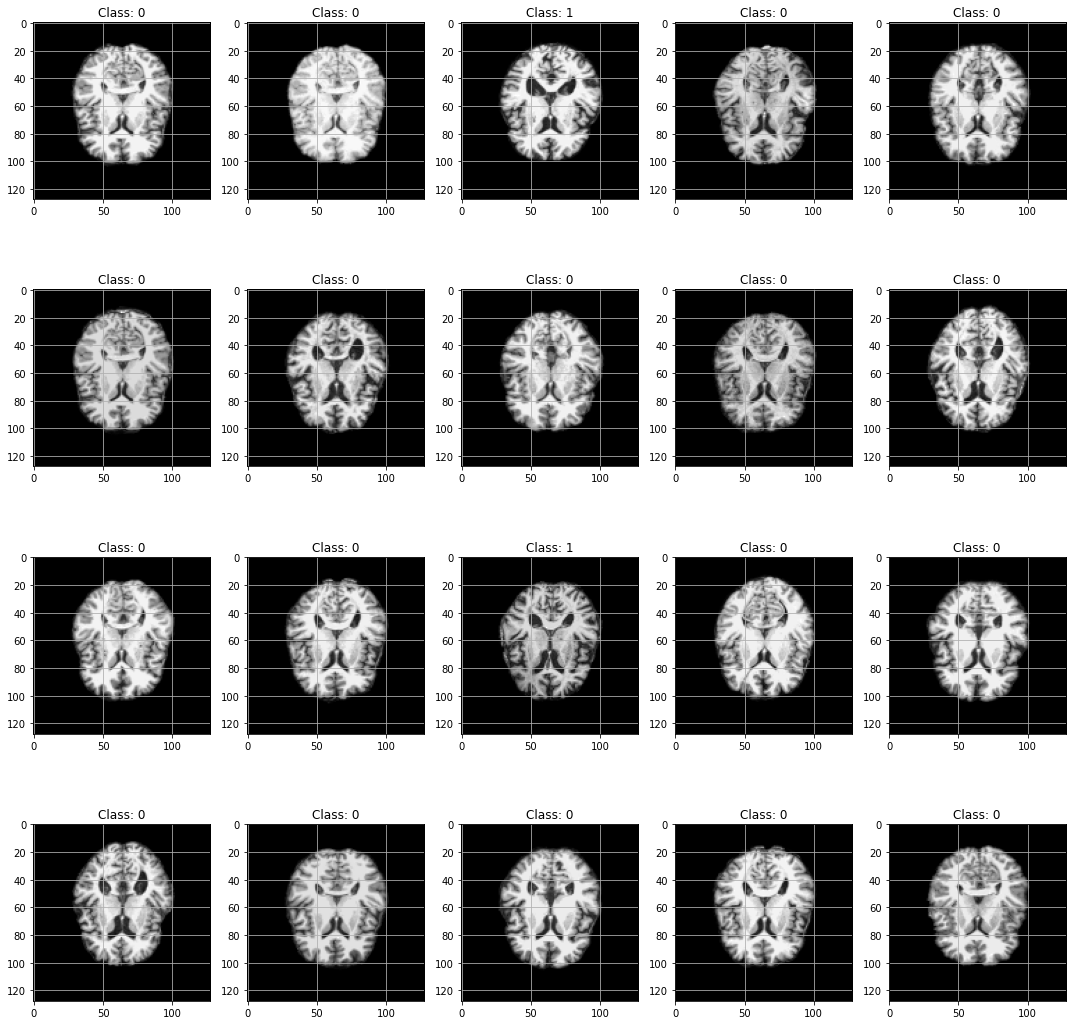

In [15]:
n_images = 20 # number of images to be plotted
plotImages(dataset.X_test[:n_images,...,0], dataset.y_test[:n_images], n_images, dataset.class_names)

# 2.0 Load the Model

In [16]:
dataset_train, dataset_val = dataset.get_tf_data()
model_train = CapsNet(model_name, mode='train', verbose=True, n_routing=n_routing)

Model: "Original_CapsNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 120, 120, 256 20992       input_9[0][0]                    
__________________________________________________________________________________________________
primary_caps_1 (PrimaryCaps)    (None, 56, 56, 32, 8 5308672     conv2d_1[0][0]                   
__________________________________________________________________________________________________
digit_caps_1 (DigitCaps)        (None, 2, 16)        25690144    primary_caps_1[0][0]             
___________________________________________________________________________________

# 3.0 Train the Model

In [17]:
history = model_train.train(dataset, initial_epoch=0)

------------------------------MNIST train------------------------------
Epoch 1/2
24/24 [==============================] - 10s 350ms/step - loss: 0.9070 - Original_CapsNet_loss: 0.8094 - Generator_loss: 0.2489 - Original_CapsNet_accuracy: 0.7593 - val_loss: 0.9066 - val_Original_CapsNet_loss: 0.8094 - val_Generator_loss: 0.2478 - val_Original_CapsNet_accuracy: 0.7600
Epoch 2/2
24/24 [==============================] - 6s 252ms/step - loss: 0.9059 - Original_CapsNet_loss: 0.8094 - Generator_loss: 0.2462 - Original_CapsNet_accuracy: 0.7593 - val_loss: 0.9046 - val_Original_CapsNet_loss: 0.8094 - val_Generator_loss: 0.2428 - val_Original_CapsNet_accuracy: 0.7600


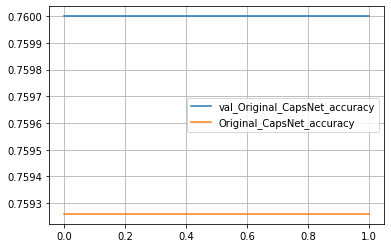

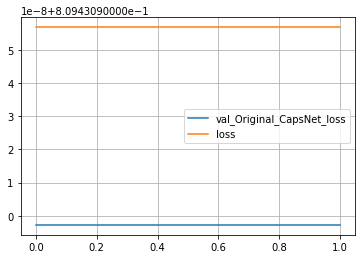

In [18]:
def plot_history(history):
    plt.plot(history.history['val_Original_CapsNet_accuracy'])
    plt.plot(history.history['Original_CapsNet_accuracy'])

    plt.legend(['val_Original_CapsNet_accuracy','Original_CapsNet_accuracy'])
    plt.grid(True)
    plt.show()


    plt.plot(history.history['val_Original_CapsNet_loss'])
    plt.plot(history.history['Original_CapsNet_loss'])

    plt.legend(['val_Original_CapsNet_loss','loss'])
    plt.grid(True)
    plt.show()
plot_history(history)